# DigiProf

DigiProf is a web application that utilizes machine learning to recognize numbers written by children, and vocalizing these numbers into sound using text-to-speech technology. The app is made to help children actively learn and recall numbers by vocalizing what they have written, thus instilling the concept of Autodidacticism or self-learning. We hope to instill a love for learning and curiosity for exploration in children that will guarantee quality education with long term self-teaching habits.

This project is developed by:

- A. P. Dumosmog
- K. M. Quirapas
- D. C. Roxas

This project is inspired by:
Sustainable Development Goals 4 — Quality Education

## 1. Importing the dataset and libraries

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow 
import keras  
import os
import glob 
from skimage import io
import skimage
import random

from sklearn.preprocessing import OneHotEncoder

## 2. Data Preprocessing

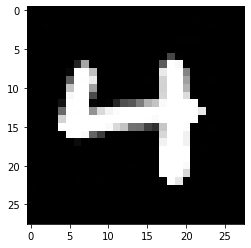

In [142]:
datasetpath = []
generalpath = r".\data"
classnames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Getting the images from the ./data folder
for index in range(10):
    indivpath = os.path.join(dataset_path, class_names[index], "*")
    indivpath = glob.glob(indivpath)
    datasetpath.append(indivpath)

datasetpath = np.ravel(datasetpath)

#Transforming the images to matrices
dataset = []
for i in range(datasetpath.shape[0]):
    image = io.imread(datasetpath[i])
    
    #Convert to grayscale
    grayimage = skimage.color.rgb2gray(image)
    
    #Inverting the grayscale image
    for i in range(grayimage.shape[0]):
        for j in range(grayimage.shape[1]):
            grayimage[i][j] = 1 - grayimage[i][j]
            
    dataset.append(grayimage)

#Normalization
normdataset = []
for image in dataset:
    normimage = (image - np.min(image)) / (np.max(image) - np.min(image))
    normdataset.append(normimage)

#Print a random image from the dataset
rng = random.randint(0, len(normdataset)-1)
sample = normdataset[rng]
fig, ax = plt.subplots(1)
fig.set_figwidth(15)
ax.imshow(sample, cmap = 'gray')

In [148]:
#Creating the X feature and Y target matrices
X = []
for image in normdataset:
    X.append(np.ravel(image))
Y = [i for i in range(10) for j in range(14)] #make this 20 when andyan na lahat ng data
    
X = np.array(X)
Y = np.array(Y)
Yreshaped = Y.reshape(-1, 1)

#Encoding target vector Y using OneHotEncoder
ohe = OneHotEncoder()
y_hot = ohe.fit_transform(Yreshaped)
print("X.shape: "+str(X.shape))
print("y_hot.shape: "+str(y_hot.shape))

X.shape: (140, 784)
y_hot.shape: (140, 10)


## 3. Exploratory Data Analysis

In [153]:
Y.value_counts()
sns.barplot(x=Y, y=range(10))

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

## 4. Data Modeling

## 5. Data Testing